<a href="https://colab.research.google.com/github/vidsvur/Python_tutorial/blob/main/Tutorial03_PandasPackagesNEON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3- Files, Packages, and some Ecology

Okay so now we have some basics of python down. We know basic math, boolean, we understood a bit of pseudocode, and how to write functions.

A small review:

1. What is the scope of a variable in a python function? In other terms, what is the "lifetime" of a variable in a function?

2. What are the benefits of using python functions? There are a lot of benefits, I'm looking for three.


In your python labs, you've been exposed (*read: thrown into the deep end*) with wrangling files, importing files, and running some functions on them. For now, let's review the basic concepts of how you did that.

Let's also introduce packages at the same time- bear with me it will make sense.. hopefully.

Okay. So remember our buddy `install.packages()` and `library()` in R? Let's try to create the analogue here.

# Terminology

**Python modules**- a single python file

**Python packages**- a directory of python files. Often has a __init__.py file- making it a python package.

Important packages- MatPlotLib, BioPython, Bioconda, BioPandas, and the like.


There's also another term- libraries- this is used interchangeably with packages, but more or less means the same thing.

## How do download python packages?

R makes it seem easy to download packages- especially since all you need is a handy-dandy `install.packages()` function.

This is mostly because most R packages are available on a centralized location- CRAN- The Comprehensive R Archive Network.

The difference in python is mostly why its a bit more convoluted to download python packages.

If you remember the video of the Python creator- he made Python as a fix, and then python was developed across users worldwide. Some python modules are distributed through user's gits, some folks upload packages to the Pythono Package Index (PyPI). There is also the use of "virtual environments" where you create a similar environment in another person's workspace to ensure reproducibility of the code.


You can mostly install python modules with pip!

## Python module: OS

The *os* and *os.path* modules include many functions to interact with the file system.

Now, let's load the os module as an example. Remember that we're working out of Colab- which means we don't have direct access to the files in our laptops.

In [ ]:
import os

cwd  = os.getcwd()
print("Current working directory:", cwd)

Current working directory: /content/Tutorial3


Let's create a new directory

In [ ]:
directory="Tutorial3"
parent_dir=cwd


new_path=os.path.join(parent_dir,directory)
os.makedirs(new_path)
print("Directory '% s' created" % directory)

Directory 'Tutorial3' created


Wait- how does my directory look?

In [ ]:
path = "/content/"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
print(dir_list)

Files and directories in ' /content/ ' :
['.config', 'Tutorial3', 'sample_data']


Now to change dirs..

In [ ]:
os.getcwd()
os.chdir('Tutorial3')
os.getcwd()

'/content/Tutorial3'

# Manipulating Files with Python


In this small chunk- let's review how to read, write, and open files using python.



`f = open(filename, mode)`

* r: open an existing file for a read operation.

* w: open an existing file for a write operation. If the file already contains some data, then it will be overridden but if the file is not present then it creates the file as well.

* a:  open an existing file for append operation. It won’t override existing data.

* r+:  To read and write data into the file. The previous data in the file will be overridden.

* w+: To write and read data. It will override existing data.

* a+: To append and read data from the file. It won’t override existing data.

## Creating our first text file with Python.

Before we manipulate files, let's first create a file.


In [ ]:
file1 = open('write.txt','w')
file1.write("This is the write command\n")
file1.write("It allows us to write in a particular file")
file1.close()

Now remember how to check files in a dir?

In [ ]:
os.listdir()

['write.txt', 'Tutorial3', '.ipynb_checkpoints']

How do you read this file? With the open command.

In [ ]:
file1 = open("write.txt", "r")
print (file1.read())

This is the write command
It allows us to write in a particular file


In [ ]:
file1 = open("write.txt", "r")
print (file1.read(4))

This


### Manipulating lines in text files

You can also split the lines in the file using the `split()` function.


In [ ]:
with open("write.txt", "r") as file11:
    data = file1.readlines()
    for line in data:
        word = line.split()
        print (word)

['is', 'the', 'write', 'command']
['It', 'allows', 'us', 'to', 'write', 'in', 'a', 'particular', 'file']


What happens if we write in the text file?

In [ ]:
with open("write.txt", "w") as f:
    f.write("Hello World!!! \n")

file1 = open("write.txt", "r")
print (file1.read())

Hello World!!! 



Notice that the file contents have been written over?

So- a point to appreciate in this code. We're effecively opening a file, and writing in to the file. The cursor is effectively moving with our f.write function. So if you immediately call `f.read()` here:

In [ ]:
with open("write.txt", "w") as f:
    f.write("Hello World!!!")
    print(f.read())

UnsupportedOperation: not readable

We would be hit with an error. SO- we need to move the cursor back to the top of the file to allow python to read the file for us again.

In [ ]:
with open("write.txt", "w+") as file1:
    file1.write("Hello World!!!")
    file1.seek(0)  # Move the file pointer to the beginning
    content = file1.read()
    print(content)

Hello World!!!


### Appending to text files

How do we add to a file without overwriting them?

In [ ]:
file1 = open('write.txt', 'a+')
file1.write("\nThis will add this line")
file1.close()


file1 = open('write.txt','r')
for each in file1:
    print (each)

Hello World!!!

This will add this line

This will add this line

This will add this line


In [ ]:
f = open('write.txt')
f.readlines()

['Hello World!!!\n',
 'This will add this line\n',
 'This will add this line\n',
 'This will add this line']

In [ ]:
f = open('write.txt')
f.read()

'Hello World!!!\nThis will add this line\nThis will add this line\nThis will add this line'

In [ ]:
f = open('write.txt')
f.readline()

'Hello World!!!\n'

# Python Exercise:

Create a text file: "story.txt" With the following text

```
A boy is playing there.\n
There is a playground.\n
An aeroplane is in the sky.\n
The sky is pink.\n
```
Write a function in python to count the number of lines from a text file "story.txt" which is not starting with an alphabet "T".

Hint: use function `startswith()`


In [ ]:
# @title My answer

with open("story.txt", "w") as file:
    file.write("A boy is playing there.\nThere is a playground.\nAn aeroplane is in the sky.\nThe sky is pink.\n")

def count_non_t_lines(file_path):
    count = 0
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if not line.startswith("T"):
                count += 1
    return count

# Usage
result = count_non_t_lines("story.txt")
print(f"Number of lines not starting with 'T': {result}")

Number of lines not starting with 'T': 2


# Packages! With Pandas

What is pandas? It's a data manipulation package in Python for tabular data.

Let's go through some small utilities of pandas, and end in another exercise.

I think we don't need to install pandas here. If we did need to install, it would've been

`pip install pandas`

In [128]:
import pandas as pd

You could've just referred to pandas as pandas, but pd reduces the amount you need to type hehe

In [174]:
df = pd.read_csv("../sample_data/california_housing_train.csv")

Apparently Google Colab has some sample data on here so that works out.

Let's look at what this dataframe has.

In [142]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [143]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [146]:
print(df.shape)

(17000, 9)


In [148]:
df.info(show_counts=True, memory_usage=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [149]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [150]:
df['total_rooms']

0        5612.0
1        7650.0
2         720.0
3        1501.0
4        1454.0
          ...  
16995    2217.0
16996    2349.0
16997    2677.0
16998    2672.0
16999    1820.0
Name: total_rooms, Length: 17000, dtype: float64

In [152]:
df[['total_rooms', 'population']]

,total_rooms,population
0,5612.0,1015.0
1,7650.0,1129.0
2,720.0,333.0
3,1501.0,515.0
4,1454.0,624.0
...,...,...
16995,2217.0,907.0
16996,2349.0,1194.0
16997,2677.0,1244.0
16998,2672.0,1298.0


In [153]:
df[df.index.isin(range(2,10))]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [156]:
df.loc[3]

longitude              -114.5700
latitude                 33.6400
housing_median_age       14.0000
total_rooms            1501.0000
total_bedrooms          337.0000
population              515.0000
households              226.0000
median_income             3.1917
median_house_value    73400.0000
Name: 3, dtype: float64

In [157]:
df.iloc[3]

longitude              -114.5700
latitude                 33.6400
housing_median_age       14.0000
total_rooms            1501.0000
total_bedrooms          337.0000
population              515.0000
households              226.0000
median_income             3.1917
median_house_value    73400.0000
Name: 3, dtype: float64

df.loc is label-based, which means that it uses the row and column labels to select data. It can select data based on a single label, a list of labels, a slice of labels, or a boolean array.

df.iloc, on the other hand, is integer position-based, which means that it uses the integer positions of rows and columns to select data.

I'm just not sure as to why my example doesn't show anything different, perhaps someone knows?

In [158]:
df.iloc[1:10, :3]

,longitude,latitude,housing_median_age
1,-114.47,34.40,19.0
2,-114.56,33.69,17.0
3,-114.57,33.64,14.0
4,-114.57,33.57,20.0
5,-114.58,33.63,29.0
6,-114.58,33.61,25.0
7,-114.59,34.83,41.0
8,-114.59,33.61,34.0
9,-114.60,34.83,46.0


In [160]:
df.loc[760:, ['longitude', 'latitude', 'housing_median_age']]

,longitude,latitude,housing_median_age
760,-117.06,32.79,17.0
761,-117.06,32.77,34.0
762,-117.06,32.77,18.0
763,-117.06,32.76,38.0
764,-117.06,32.76,24.0
...,...,...,...
16995,-124.26,40.58,52.0
16996,-124.27,40.69,36.0
16997,-124.30,41.84,17.0
16998,-124.30,41.80,19.0


## Mini exercise!

https://pandas.pydata.org/docs/reference/general_functions.html

Use the above website and output

1. The mean of each column value
2. The mode of each column value
3. Create a new column "median_income_per_household"
4. Write a pandas code to calculate the mean (average) values of 'total_rooms', 'total_bedrooms', and 'housing_median_age' for each unique combination of 'longitude' and 'latitude'.
  Hint: use `.groupby()`

In [164]:
# @title Ans 1
df.mean()

longitude               -119.562108
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
dtype: float64

In [165]:
# @title Ans 2
df.mode()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-118.31,34.06,52.0,1582.0,280.0,891.0,306.0,3.125,500001.0
1,NaN,NaN,NaN,NaN,NaN,NaN,386.0,NaN,NaN


In [166]:
# @title And 3
df['median_income_per_household'] = df['median_income']/df['households']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_per_household
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0.003164
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0.003931
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0.014110
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0.014123
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0.007347


In [171]:
# @title Ans 4
df.groupby(['longitude', 'latitude'])[['total_rooms', 'total_bedrooms', 'housing_median_age']].mean()

total_rooms  total_bedrooms  housing_median_age
longitude latitude                                                 
-124.35   40.54          1820.0           300.0                52.0
-124.30   41.80          2672.0           552.0                19.0
          41.84          2677.0           531.0                17.0
-124.27   40.69          2349.0           528.0                36.0
-124.26   40.58          2217.0           394.0                52.0
...                         ...             ...                 ...
-114.57   33.57          1454.0           326.0                20.0
          33.64          1501.0           337.0                14.0
-114.56   33.69           720.0           174.0                17.0
-114.47   34.40          7650.0          1901.0                19.0
-114.31   34.19          5612.0          1283.0                15.0

[11054 rows x 3 columns]

## Plotting with Pandas

<Axes: >

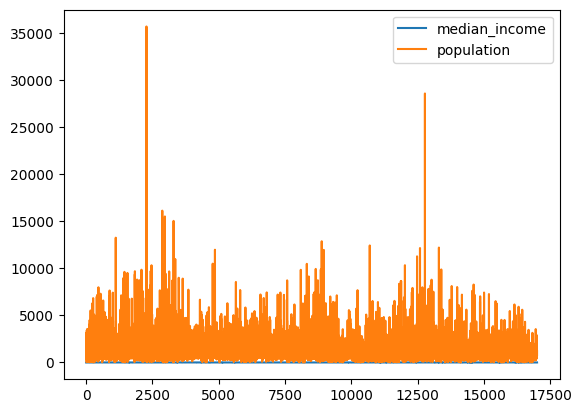

In [163]:
df[['median_income', 'population']].plot.line()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

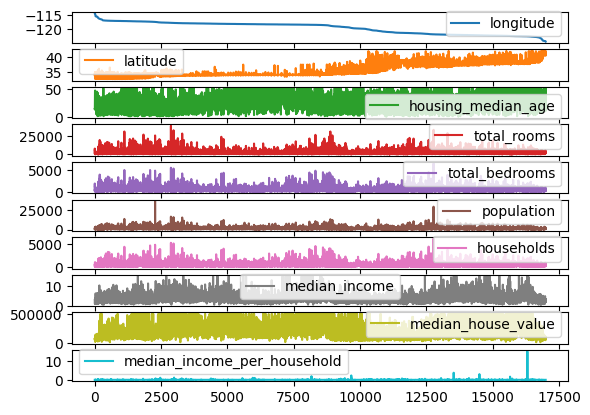

In [172]:
df.plot.line(subplots=True)

## Another mini exercise!

Use only the first ten observations for each variable (remember iloc[])

Google the function to create boxplots.

Using that function, create a boxplot of housing_median_age and median_income

<Axes: title={'center': 'housing_median_age'}, xlabel='median_income'>

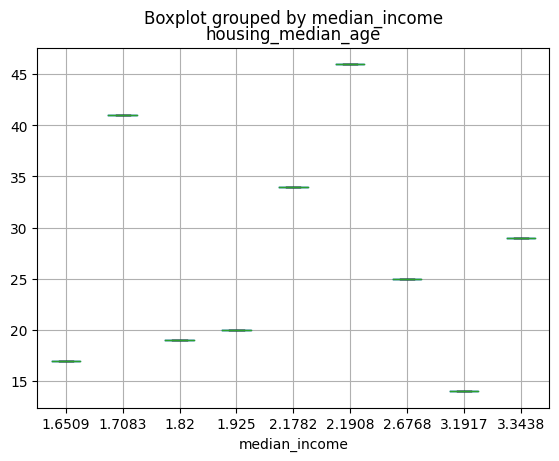

In [181]:
# @title My plot
df2=df.iloc[1:10]
df2.boxplot(column=['housing_median_age'], by='median_income')

# Using neonUtilities in Python


The National Ecological Observatory Network (NEON) provides standardized, quality-controlled data products on a variety of topics, including remote sensing, soil, organismal, biogeochemical, freshwater aquatic, and meteorological data.

NeonUtilities is an R package that helps users discover, download, and work with NEON data files. These files can be downloaded from the NEON Data Portal or API.

In [182]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

In [183]:
base = importr('base')
utils = importr('utils')
stats = importr('stats')

In [184]:
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)

In [185]:
utils.install_packages('neonUtilities', repos='https://cran.rstudio.com/');

In [186]:
neonUtilities = importr('neonUtilities')

In [199]:
neonUtilities.stackByTable(filepath='/content/NEON_temp-bio.zip');

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  
Stacking operation across a single core.
Stacking table IRBT_1_minute
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01s  
Stacking table IRBT_30_minute
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  
Merged the most recent publication of sensor position files for each site and saved to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 2 data tables and 3 metadata tables!
Stacking took 3.305194 secs
All unzipped monthly data folders have been removed.


In [189]:
os.listdir()
os.mkdir("/content/NEON")
os.chdir("../NEON")

In [190]:
neonUtilities.zipsByProduct(dpID='DP1.10003.001',
                            site=base.c('HARV','BART'),
                            savepath='.',
                            package='basic',
                            check_size='FALSE');

Finding available files
  |======================================================================| 100%
Provisional data were excluded from available files list. To download provisional data, use input parameter include.provisional=TRUE.
  |======================================================================| 100%
18 files successfully downloaded to ./filesToStack10003


In [191]:
neonUtilities.stackByTable(filepath='./filesToStack10003');

Unpacking zip files using 1 cores.
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  
Stacking operation across a single core.
Stacking table brd_countdata
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  
Stacking table brd_perpoint
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  
Copied the most recent publication of validation file to /stackedFiles
Copied the most recent publication of categoricalCodes file to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 2 data tables and 4 metadata tables!
Stacking took 2.181611 secs
All unzipped monthly data folders have been removed.


In [192]:
os.listdir('./filesToStack10003/stackedFiles/')

['validation_10003.csv',
 'issueLog_10003.csv',
 'variables_10003.csv',
 'readme_10003.txt',
 'categoricalCodes_10003.csv',
 'brd_perpoint.csv',
 'citation_10003_RELEASE-2024.txt',
 'brd_countdata.csv']

I'm as shocked as you are I didn't know it would be this easy.

What happened here is that we've successfully downloaded a module that would help us use R through python!

Remember R's `rnorm()`?
We can run that through python here!

This reads as `package::funtion(inputs)`

In [193]:
stats.rnorm(6, 0, 1)

0.780390,-0.486347,-1.586848,0.700864,2.746331,-0.632580


Okay back to what we downloaded. Do you see the `brd` files? Let's load that with pandas.

In [195]:
brd_perpoint = pd.read_csv('./filesToStack10003/stackedFiles/brd_perpoint.csv')
brd_countdata = pd.read_csv('./filesToStack10003/stackedFiles/brd_countdata.csv')

Now let's see what's in here

In [196]:
brd_perpoint.head()

,uid,namedLocation,domainID,siteID,plotID,plotType,pointID,nlcdClass,decimalLatitude,decimalLongitude,...,endRH,observedHabitat,observedAirTemp,kmPerHourObservedWindSpeed,laboratoryName,samplingProtocolVersion,remarks,measuredBy,publicationDate,release
0,15fe6b3c-715c-460a-b196-6bc62c6562fc,BART_025.birdGrid.brd,D01,BART,BART_025,distributed,3,evergreenForest,44.060146,-71.315479,...,56.0,evergreen forest,18.0,1.0,Bird Conservancy of the Rockies,NEON.DOC.014041vG,NaN,JRUEB,20231226T232626Z,RELEASE-2024
1,fddcd0f8-29e9-4927-a69f-3226fb88440f,BART_025.birdGrid.brd,D01,BART,BART_025,distributed,2,evergreenForest,44.060146,-71.315479,...,56.0,deciduous forest,19.0,3.0,Bird Conservancy of the Rockies,NEON.DOC.014041vG,NaN,JRUEB,20231226T232626Z,RELEASE-2024
2,d75edacc-8ebd-459a-af16-c489156f9c38,BART_025.birdGrid.brd,D01,BART,BART_025,distributed,1,evergreenForest,44.060146,-71.315479,...,56.0,mixed deciduous/evergreen forest,17.0,0.0,Bird Conservancy of the Rockies,NEON.DOC.014041vG,NaN,JRUEB,20231226T232626Z,RELEASE-2024
3,ed03920c-c32a-4fec-98ed-d8003ad31e91,BART_025.birdGrid.brd,D01,BART,BART_025,distributed,4,evergreenForest,44.060146,-71.315479,...,56.0,deciduous forest,19.0,0.0,Bird Conservancy of the Rockies,NEON.DOC.014041vG,NaN,JRUEB,20231226T232626Z,RELEASE-2024
4,dbd49536-c0d7-450f-a154-aaa615daea18,BART_025.birdGrid.brd,D01,BART,BART_025,distributed,5,evergreenForest,44.060146,-71.315479,...,56.0,deciduous forest,16.0,0.0,Bird Conservancy of the Rockies,NEON.DOC.014041vG,NaN,JRUEB,20231226T232626Z,RELEASE-2024


## Mini exercise!

Load `IRBT_30_minute.csv` into a variable called `IRBT30`

Hint: Look at the folder icon to the left to see where NEON_temp-bio.zip is

run a head function on it

In [200]:
# @title Load IRBT30
IRBT30 = pd.read_csv('../NEON_temp-bio/stackedFiles/IRBT_30_minute.csv')
IRBT30.head()

,domainID,siteID,horizontalPosition,verticalPosition,startDateTime,endDateTime,bioTempMean,bioTempMinimum,bioTempMaximum,bioTempVariance,bioTempNumPts,bioTempExpUncert,bioTempStdErMean,finalQF,publicationDate,release
0,D03,DSNY,0,10,2023-04-01T00:00:00Z,2023-04-01T00:30:00Z,22.77,22.08,23.40,0.10,1118.0,0.54,0.01,1,20230502T232138Z,RELEASE-2024
1,D03,DSNY,0,10,2023-04-01T00:30:00Z,2023-04-01T01:00:00Z,21.46,20.81,22.06,0.11,991.0,0.54,0.01,1,20230502T232138Z,RELEASE-2024
2,D03,DSNY,0,10,2023-04-01T01:00:00Z,2023-04-01T01:30:00Z,20.40,19.97,20.85,0.04,1800.0,0.54,0.00,0,20230502T232138Z,RELEASE-2024
3,D03,DSNY,0,10,2023-04-01T01:30:00Z,2023-04-01T02:00:00Z,20.35,20.04,20.74,0.02,1800.0,0.54,0.00,0,20230502T232138Z,RELEASE-2024
4,D03,DSNY,0,10,2023-04-01T02:00:00Z,2023-04-01T02:30:00Z,20.08,19.62,20.53,0.02,1800.0,0.54,0.00,0,20230502T232138Z,RELEASE-2024


And the final step- to download remote sensing data!

Here, we'll download Ecosystem structure (Canopy Height Model) data from Hopbrook (HOPB) in 2017.

In [201]:
neonUtilities.byFileAOP(dpID='DP3.30015.001', site='HOPB',
                        year='2017', check_size='FALSE',
                       savepath='.');

  |======================================================================| 100%
Successfully downloaded 217 files to ./DP3.30015.001


In [203]:
!pip install rasterio
import rasterio
CHMtile = rasterio.open('./DP3.30015.001/neon-aop-products/2017/FullSite/D01/2017_HOPB_2/L3/DiscreteLidar/CanopyHeightModelGtif/NEON_D01_HOPB_DP3_718000_4709000_CHM.tif')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 47.2 MB/s eta 0:00:00


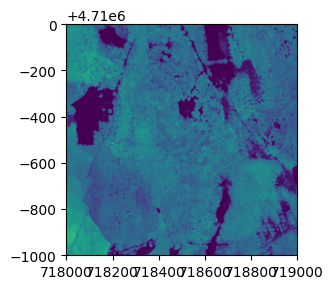

<Axes: >

In [204]:
import matplotlib.pyplot as plt
from rasterio.plot import show
fig, ax = plt.subplots(figsize = (8,3))
show(CHMtile)